# Question 2

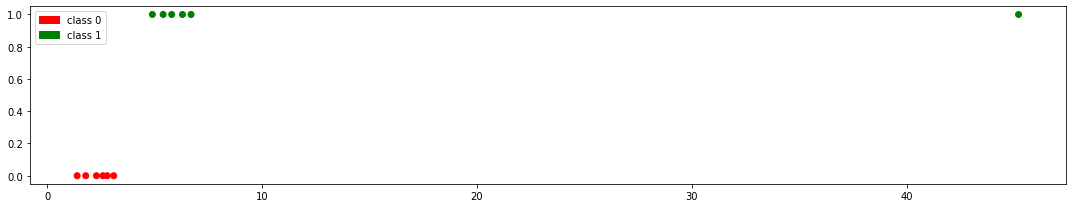

In [2]:
# imprt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.linear_model import LogisticRegression, LinearRegression

x =np.array([2.3,1.4,2.6,3.1,1.8,2.8,5.4,6.3,5.8,6.7,4.9,45.2])
y = np.array([0,0,0,0,0,0,1,1,1,1,1,1])

colormap = np.array(['r', 'g'])
red_patch = mpatches.Patch(color='r', label='class 0')
green_patch = mpatches.Patch(color='g', label='class 1')

plt.figure(figsize=(15, 3))
plt.scatter(x, y, c=colormap[y])
plt.legend(handles=[red_patch, green_patch])
plt.tight_layout()
plt.show()


weigh is [[1.43516077]] and bias is [-5.9247354]
----------------------------------------------------------------------------------------------------
x decision boundary is [4.12827297]
----------------------------------------------------------------------------------------------------


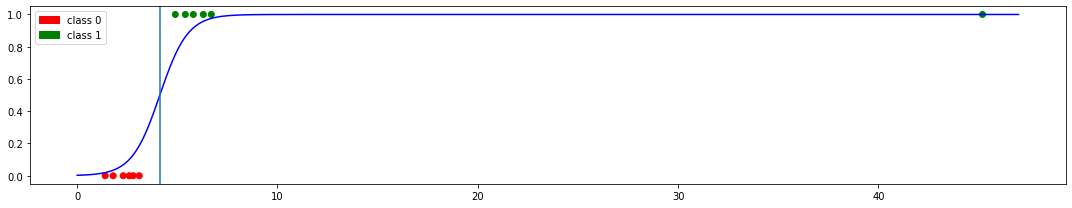

In [3]:
# train model logistic regression
log_model = LogisticRegression()
log_model.fit(x.reshape(-1,1), y)
w = log_model.coef_
b = log_model.intercept_

""" if we consider theroshold as 0.5 then the sigmoid(z) should equal to 0.5 it means the z should be z=0.
    so if we want to z=0 then we shoudl find x with weight and bias computed with logistic regression z= w * x + b & z=0 ===> x_boundry = -b/w   """
# compute x desision boundary
x_decision_boundary= -b/w[0]
print(f'weigh is {w} and bias is {b}')
print('-'*100)
print(f"x decision boundary is {x_decision_boundary}")
print('-'*100)

plt.figure(figsize=(15, 3))
plt.scatter(x, y, c=colormap[y])
plt.legend(handles=[red_patch, green_patch])
tmp = np.linspace(0, 47, 1000)
plt.plot( tmp , 1/(1+np.exp(-(b + (w[0] * tmp)))) , c = 'b')
plt.tight_layout()
plt.axvline(x_decision_boundary)
plt.show()

weigh is [0.01885095] and bias is 0.36128845022604983
----------------------------------------------------------------------------------------------------
x decision boundary is 7.358333333333335
----------------------------------------------------------------------------------------------------


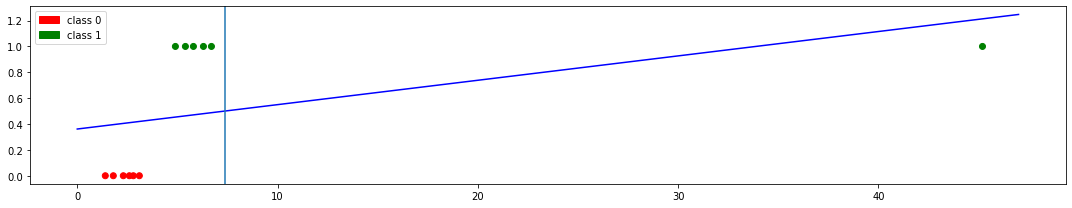

In [4]:
# train model linear regression
line_model = LinearRegression()
line_model.fit(x.reshape(-1,1), y)

w_l = line_model.coef_
b_l = line_model.intercept_

""" here is exactly same as above cell and in here we should compute x_boundry but in here we shoudl compute it for linear regression model and the equeation is different.
    z = w * x + b & z = 0.5 ==> x = (0.5-b)/w """
x_boundary_linear = (0.5 - b_l)/w_l[0]

print(f'weigh is {w_l} and bias is {b_l}')
print('-'*100)
print(f"x decision boundary is {x_boundary_linear}")
print('-'*100)

plt.figure(figsize=(15, 3))
plt.scatter(x, y, c=colormap[y])
plt.legend(handles=[red_patch, green_patch])
tmp = np.linspace(0, 47, 1000)
plt.plot( tmp , tmp * w_l[0] + b_l , c = 'b')
plt.tight_layout()
plt.axvline(x_boundary_linear)
plt.show()


# Question 3

In [5]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.patches as mpatches
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [6]:
dataset = datasets.load_iris()
data = dataset.data
print(data.shape, data.ndim)
target = dataset.target
print(target.shape, target.ndim)

(150, 4) 2
(150,) 1


In [7]:
# load dataset and pick 2 features
dataset = datasets.load_iris()
X = dataset.data[:, :2]
Y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.3, random_state= 0)


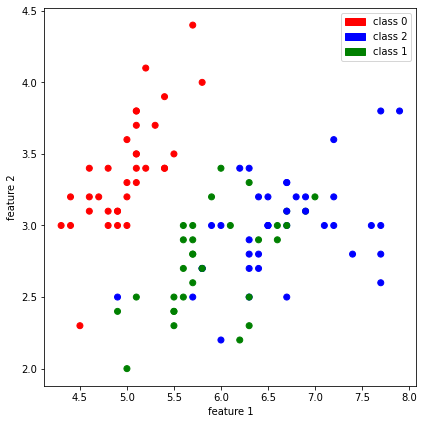

In [8]:
# plot train data
x_index = 0
y_index = 1

colormap = np.array(['r', 'g', 'b'])
red_patch = mpatches.Patch(color='r', label='class 0')
green_patch = mpatches.Patch(color='g', label='class 1')
blue_patch = mpatches.Patch(color='b', label='class 2')

plt.figure(figsize=(6, 6))
plt.scatter(x_train[:, x_index], x_train[:, y_index], c=colormap[y_train])

plt.xlabel('feature 1')
plt.ylabel("feature 2")
plt.legend(handles=[red_patch, blue_patch, green_patch])
plt.tight_layout()
plt.show()

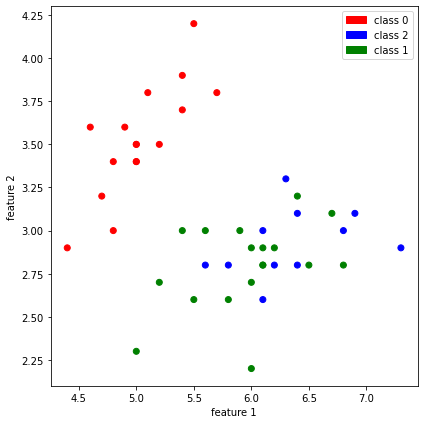

In [9]:
# plot test data
x_index = 0
y_index = 1

colormap = np.array(['r', 'g', 'b'])
red_patch = mpatches.Patch(color='r', label='class 0')
green_patch = mpatches.Patch(color='g', label='class 1')
blue_patch = mpatches.Patch(color='b', label='class 2')

plt.figure(figsize=(6, 6))
plt.scatter(x_test[:, x_index], x_test[:, y_index], c=colormap[y_test])

plt.xlabel('feature 1')
plt.ylabel("feature 2")
plt.legend(handles=[red_patch, blue_patch, green_patch])
plt.tight_layout()
plt.show()

In [10]:
# normal the data of 2 features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
# creat our model

classifier = LogisticRegression(multi_class='auto')
classifier.fit(x_train, y_train)


print(f' This is the accuracy of train data :  {classifier.score(x_train, y_train)}')

y_predict = classifier.predict(x_test)


cm = confusion_matrix(y_predict,y_test)
print(cm)
print('-'*100)
print(classification_report(y_predict,y_test))


 This is the accuracy of train data :  0.819047619047619
[[16  0  0]
 [ 0 13  3]
 [ 0  5  8]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.72      0.81      0.76        16
           2       0.73      0.62      0.67        13

    accuracy                           0.82        45
   macro avg       0.82      0.81      0.81        45
weighted avg       0.82      0.82      0.82        45



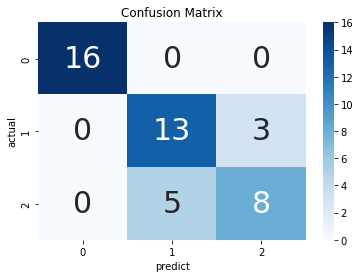

In [12]:
# draw confusion Matrix
import seaborn as sns
import pandas as pd

ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_xlabel('predict')
ax.set_ylabel('actual')
ax.set_title('Confusion Matrix')
plt.show()